<a href="https://colab.research.google.com/github/DarkWorldCoder/LearningAI/blob/master/TransferLearning%5B0%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning with tensorflow part 1


Transfer learning is leveraging a working model's existing architecture and learned patterns for our own problems

# Download and be same with data



In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


--2023-05-26 05:11:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.119.128, 108.177.111.128, 142.250.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   102MB/s    in 1.6s    

2023-05-26 05:11:26 (102 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:

import os

for dirpath,dirnames,filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
  

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (244,244)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode="categorical"
                                                          )

print("Testing Images")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical"
                                             )



Training images
Found 750 images belonging to 10 classes.
Testing Images
Found 2500 images belonging to 10 classes.


In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
efficient_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
# Setting up callbacks

# Creating Tensorboard callback

import datetime

def create_tensorboard_callback(dir_name,experiment_name):
  log_dir = dir_name + "/" + experiment_name + datetime.datetime.now().strftime("%Y%m%d-%H%M%s")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"Saving Tensorboard log files to: {log_dir}")
  return tensorboard_callback



Creating models Using Tensorflow hub

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers 

In [ ]:
def create_model(model_url,num_classes=10):
  feature_extraction_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name="feature_extraction_layer",
                                           input_shape = IMAGE_SHAPE + (3,) 
                                           )
  model = tf.keras.Sequential([
      feature_extraction_layer,
      layers.Dense(num_classes,activation="softmax",name="output_layer")
  ])

  return model


Creating and testing resnet TensorflowMM

In [ ]:
resnet_model = create_model(resnet_url,num_classes=train_data_10_percent.num_classes)
 

In [ ]:
resnet_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"]
                     )

In [ ]:
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch = len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps = len(test_data)
                                  ,
                                  callbacks=[create_tensorboard_callback(
                                      dir_name="tensorflow_hub",
                                      experiment_name='resnet50v2'

                                  )]
                                  )

Saving Tensorboard log files to: tensorflow_hub/resnet50v220230526-05111685077900
Epoch 1/5
24/24 [==============================] - 35s 888ms/step - loss: 1.8229 - accuracy: 0.3973 - val_loss: 1.1414 - val_accuracy: 0.6544
Epoch 2/5
24/24 [==============================] - 25s 1s/step - loss: 0.8946 - accuracy: 0.7373 - val_loss: 0.8066 - val_accuracy: 0.7532
Epoch 3/5
24/24 [==============================] - 24s 1s/step - loss: 0.6216 - accuracy: 0.8280 - val_loss: 0.6923 - val_accuracy: 0.7864
Epoch 4/5
24/24 [==============================] - 20s 857ms/step - loss: 0.4825 - accuracy: 0.8867 - val_loss: 0.6497 - val_accuracy: 0.8016
Epoch 5/5
24/24 [==============================] - 25s 1s/step - loss: 0.3884 - accuracy: 0.9147 - val_loss: 0.6243 - val_accuracy: 0.8016


In [ ]:
# ?Lets Create a function to plot our 

import matplotlib.pyplot as plt

def plot_loss_curves(history):
  val_loss = history.history["val_loss"]
  loss = history.history["loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs,loss,label="Training_loss")
  plt.plot(epochs,val_loss,label="Val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label="Training _accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

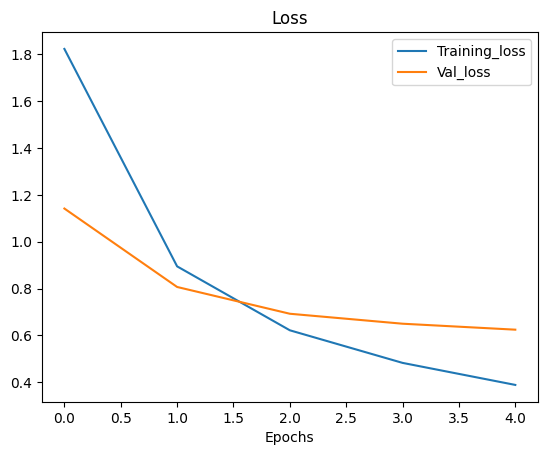

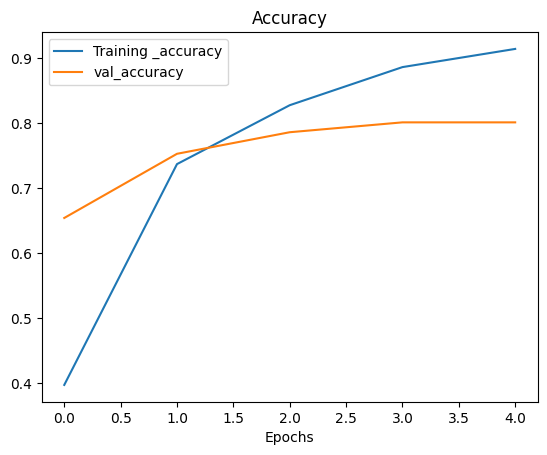

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
efficient_model = create_model(model_url=efficient_url)
efficient_model.compile(loss='categorical_crossentropy',
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"]
                        )

efficientnet_history = efficient_model.fit(train_data_10_percent,
                                           epochs=5,
                                           validation_data=test_data,
                                           validation_steps=len(test_data),
                                           callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                     experiment_name="efficientnetb0") 
                                                      ]
                                           )


Saving Tensorboard log files to: tensorflow_hub/efficientnetb020230526-05141685078071
Epoch 1/5
24/24 [==============================] - 32s 900ms/step - loss: 1.8374 - accuracy: 0.4533 - val_loss: 1.3001 - val_accuracy: 0.7536
Epoch 2/5
24/24 [==============================] - 18s 753ms/step - loss: 1.0664 - accuracy: 0.7840 - val_loss: 0.8667 - val_accuracy: 0.8316
Epoch 3/5
24/24 [==============================] - 18s 778ms/step - loss: 0.7600 - accuracy: 0.8320 - val_loss: 0.6905 - val_accuracy: 0.8468
Epoch 4/5
24/24 [==============================] - 17s 724ms/step - loss: 0.6101 - accuracy: 0.8733 - val_loss: 0.6026 - val_accuracy: 0.8596
Epoch 5/5
24/24 [==============================] - 25s 1s/step - loss: 0.5163 - accuracy: 0.8987 - val_loss: 0.5488 - val_accuracy: 0.8652


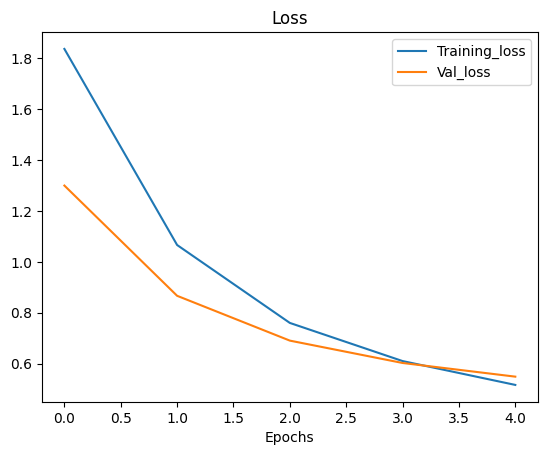

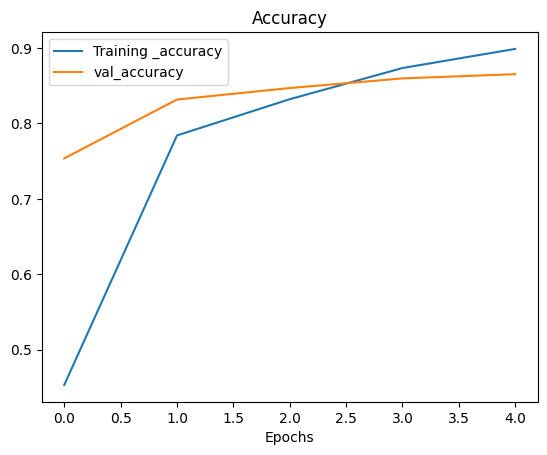

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:


!tensorboard dev upload --logdir ./tensorflow_hub/ \
--name  "EfficientNetB0 vs ResNet50v2" \
--description "Comparing two different TF hub feature model" \
--one_shot

2023-05-26 05:17:30.189657: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   NZJF-VPRD

 NZJF-VPRD
NZJF-VPRD


New experiment created. View your TensorBoard at: https:/